In [1]:
import pandas as pd
import numpy as np
from scipy import optimize, linalg
import scipy
from scipy import spatial
import re
import math
import pandas as pd
from numpy import zeros, dot, savetxt
import matplotlib
from matplotlib import pylab as plt
from math import ceil
%matplotlib inline

In [2]:
x = [1.2, 1.3, 1.4, 1.6, 1.7, 1.9]
y = [0.6703, 0.5169, 0.4350, 0.2800, 0.2541, 0.2466]

In [12]:
k = 1
izn2 = [1.2, 1.3, 1.4, 1.6, 1.7, 1.9]
fzn2 = [0.6703, 0.5169, 0.4350, 0.2800, 0.2541, 0.2466]

In [13]:
l = int(len(x)/k)
izn3 = [izn2[n*l] for n in range(k)] + [izn2[-1]];
fzn3 = [fzn2[n*l] for n in range(k)] + [fzn2[-1]]

In [14]:
def halfchange(arr, size): #разбиваем участок на интервалы, находим среднее по интервалу и строим линии 
    return list(map(lambda x: arr[x * size:x * size + size],
                    list(range(0, ceil(len(arr) / size)))))
izn3 = [];fzn3 = []
izn3 += [sum(i)/len(i) for i in halfchange(izn2, k)]
fzn3 += [sum(i)/len(i) for i in halfchange(fzn2, k)]
print(izn3, '\n', fzn3)

[1.2, 1.3, 1.4, 1.6, 1.7, 1.9] 
 [0.6703, 0.5169, 0.435, 0.28, 0.2541, 0.2466]


In [15]:
koeff = [] #нахождение коэф кполинома
def koeff_search(izn3 = izn3, fzn3 = fzn3):
    work_m = izn3
    znach_func = fzn3
    for i in range(len(work_m)):            #из списка в матрицу
        work_m[i] = [work_m[i]]
    for i in range(len(work_m)):            #умножения количества элементов 
        work_m[i] = work_m[i] * (len(work_m))
    N = 0
    for i in range(len(work_m)):            #создание матрицы квадратов
        for j in range(len(work_m)):
            work_m[i][j] = work_m[i][j] ** N
            N += 1
        N = 0
    koeff = np.linalg.solve(work_m, znach_func) #Находим решение системы
    return koeff

In [16]:
def Polin_func2(vector, koeff = koeff):
    znach_v = []
    shab = []
    for znach in vector:
        for i in range(len(koeff)):
            shab += [koeff[i] * (znach ** i)]
        znach_v += [float(sum(shab))]
        shab = []
    return znach_v

In [17]:
c =  koeff_search();c 

array([  409.82909334, -1354.53584685,  1787.19101194, -1173.78194447,
         383.32261906,   -49.76587302])

In [18]:
dis = np.linspace(1.2, 1.9, num = 20)

<function matplotlib.pyplot.show(*args, **kw)>

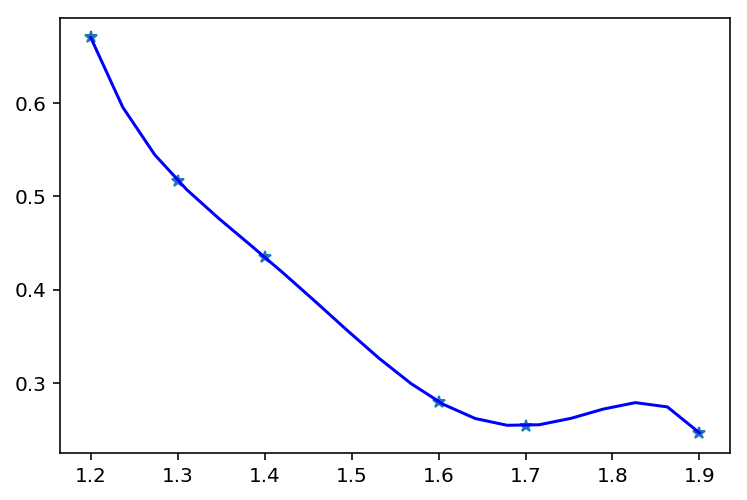

In [19]:
plt.plot(x, y, '*', dis, Polin_func2(dis, koeff=c),'-b')

plt.show

In [11]:
print(abs(np.array(y)) - abs(np.array(Polin_func2(x, koeff=c))))
print(np.sqrt(sum([i - sum(y)/len(y) for i in Polin_func2(x, koeff=c)])/(len(x)*(len(x)-1))));print(4.8348823929e-15)
print(y)
print(Polin_func2(x, koeff=c))

[ 1.42695652e-01  2.94391304e-02 -1.23173913e-02 -8.70304348e-02
 -7.27869565e-02 -1.38777878e-16]
4.712160915387242e-09
4.8348823929e-15
[0.6703, 0.5169, 0.435, 0.28, 0.2541, 0.2466]
[0.527604347826087, 0.4874608695652174, 0.4473173913043479, 0.36703043478260877, 0.32688695652173927, 0.24660000000000015]
